# Announcements - Wednesday, November 15

* Download ALL files for today's lecture
* Q8 released tonight at 5:00 pm - due on Friday at 11:59 pm
* P10 due tonight at 11:59 pm
* <b>If you have any problem with P6 grades, please send me (Gurmail.Singh@wisc.edu) an email by November 15.</b>
* If you have questions, it is almost always faster to 
  * Post on Piazza
  * Go to [office hours](https://sites.google.com/wisc.edu/cs220-oh-f23/home?pli=1) 
* Exam2 results - you may get your grades by the evening

### Conflict Form
  * [Final - December 19, 7:45 am](https://cs220.cs.wisc.edu/f23/surveys.html)

# Web 1 - How to get data from the Internet

In [1]:
import requests
import json
import pandas as pd
from pandas import Series, DataFrame

###  P10 check-in

In [2]:
# It is very important to check auto-grader test results on p10 in a timely manner.
# Take a few minutes to verify if you hardcoded the slashes in P10 rather than using os.path.join? 
       # Your code won't clear auto-grader if you hardcode either "/" or "\" 
       # for *ANY* relative path in the entire project
# Check your code and check the autograder as soon as possible.

### Warmup 1: Read the data from "IMDB-Movie-Data.csv" into a pandas DataFrame called "movies"

In [3]:
movies = pd.read_csv("IMDB-Movie-Data.csv")
movies

Index                           Title                         Genre  \
0         0         Guardians of the Galaxy       Action,Adventure,Sci-Fi   
1         1                      Prometheus      Adventure,Mystery,Sci-Fi   
2         2                           Split               Horror,Thriller   
3         3                            Sing       Animation,Comedy,Family   
4         4                   Suicide Squad      Action,Adventure,Fantasy   
...     ...                             ...                           ...   
1063   1063  Guardians of the Galaxy Vol. 2     Action, Adventure, Comedy   
1064   1064                     Baby Driver          Action, Crime, Drama   
1065   1065                  Only the Brave      Action, Biography, Drama   
1066   1066                   Incredibles 2  Animation, Action, Adventure   
1067   1067                  A Star Is Born         Drama, Music, Romance   

                  Director                                               Cast  \
0               James Gunn  Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...   
1             Ridley Scott  Noomi Rapace, Logan Marshall-Green, Michael   ...   
2       M. Night Shyamalan  James McAvoy, Anya Taylor-Joy, Haley Lu Richar...   
3     Christophe Lourdelet  Matthew McConaughey,Reese Witherspoon, Seth Ma...   
4               David Ayer  Will Smith, Jared Leto, Margot Robbie, Viola D...   
...                    ...                                                ...   
1063            James Gunn  Chris Pratt, Zoe Saldana, Dave Bautista, Vin D...   
1064          Edgar Wright  Ansel Elgort, Jon Bernthal, Jon Hamm, Eiza Gon...   
1065       Joseph Kosinski  Josh Brolin, Miles Teller, Jeff Bridges, Jenni...   
1066             Brad Bird  Craig T. Nelson, Holly Hunter, Sarah Vowell, H...   
1067        Bradley Cooper  Lady Gaga, Bradley Cooper, Sam Elliott, Greg G...   

      Year  Runtime  Rating  Revenue  
0     2014      121     8.1   333.13  
1     2012      124     7.0  126.46M  
2     2016      117     7.3  138.12M  
3     2016      108     7.2   270.32  
4     2016      123     6.2   325.02  
...    ...      ...     ...      ...  
1063  2017      136     7.6   389.81  
1064  2017      113     7.6   107.83  
1065  2017      134     7.6    18.34  
1066  2018      118     7.6   608.58  
1067  2018      136     7.6   215.29  

[1068 rows x 9 columns]

### Warmup 2: fixing duplicate index columns

Notice that there are two index columns
- That happened because when you write a csv from pandas to a file, it writes a new index column
- So if the DataFrame already contains an index, you are going to get two index columns
- Let's fix that problem

In [4]:
#use slicing to retain all the rows and columns excepting for column with integer position 0
movies = movies.iloc[:, 1:] 
movies

Title                         Genre  \
0            Guardians of the Galaxy       Action,Adventure,Sci-Fi   
1                         Prometheus      Adventure,Mystery,Sci-Fi   
2                              Split               Horror,Thriller   
3                               Sing       Animation,Comedy,Family   
4                      Suicide Squad      Action,Adventure,Fantasy   
...                              ...                           ...   
1063  Guardians of the Galaxy Vol. 2     Action, Adventure, Comedy   
1064                     Baby Driver          Action, Crime, Drama   
1065                  Only the Brave      Action, Biography, Drama   
1066                   Incredibles 2  Animation, Action, Adventure   
1067                  A Star Is Born         Drama, Music, Romance   

                  Director                                               Cast  \
0               James Gunn  Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...   
1             Ridley Scott  Noomi Rapace, Logan Marshall-Green, Michael   ...   
2       M. Night Shyamalan  James McAvoy, Anya Taylor-Joy, Haley Lu Richar...   
3     Christophe Lourdelet  Matthew McConaughey,Reese Witherspoon, Seth Ma...   
4               David Ayer  Will Smith, Jared Leto, Margot Robbie, Viola D...   
...                    ...                                                ...   
1063            James Gunn  Chris Pratt, Zoe Saldana, Dave Bautista, Vin D...   
1064          Edgar Wright  Ansel Elgort, Jon Bernthal, Jon Hamm, Eiza Gon...   
1065       Joseph Kosinski  Josh Brolin, Miles Teller, Jeff Bridges, Jenni...   
1066             Brad Bird  Craig T. Nelson, Holly Hunter, Sarah Vowell, H...   
1067        Bradley Cooper  Lady Gaga, Bradley Cooper, Sam Elliott, Greg G...   

      Year  Runtime  Rating  Revenue  
0     2014      121     8.1   333.13  
1     2012      124     7.0  126.46M  
2     2016      117     7.3  138.12M  
3     2016      108     7.2   270.32  
4     2016      123     6.2   325.02  
...    ...      ...     ...      ...  
1063  2017      136     7.6   389.81  
1064  2017      113     7.6   107.83  
1065  2017      134     7.6    18.34  
1066  2018      118     7.6   608.58  
1067  2018      136     7.6   215.29  

[1068 rows x 8 columns]

In [5]:
movies.to_csv("better_movies.csv", index = False)

### Warmup 3: Which movie has highest rating?

In [6]:
max_rating = movies["Rating"].max()
movies[movies["Rating"] == max_rating]

Title               Genre           Director  \
54  The Dark Knight  Action,Crime,Drama  Christopher Nolan   

                                                 Cast  Year  Runtime  Rating  \
54  Christian Bale, Heath Ledger, Aaron Eckhart,Mi...  2008      152     9.0   

   Revenue  
54  533.32

### Warmup 4: Which movies were released in 2020?

In [7]:
movies[movies["Year"] == 2020]

Title                         Genre  \
998                     Hamilton     Biography, Drama, History   
1000             Soorarai Pottru                         Drama   
1022                        Soul  Animation, Adventure, Comedy   
1031                 Dil Bechara        Comedy, Drama, Romance   
1047  The Trial of the Chicago 7      Drama, History, Thriller   
1048                        Druk                 Comedy, Drama   

               Director                                               Cast  \
998         Thomas Kail  Lin-Manuel Miranda, Phillipa Soo, Leslie Odom ...   
1000      Sudha Kongara  Suriya, Madhavan, Paresh Rawal, Aparna Balamurali   
1022        Pete Docter   Kemp Powers, Jamie Foxx, Tina Fey, Graham Norton   
1031     Mukesh Chhabra  Sushant Singh Rajput, Sanjana Sanghi, Sahil Va...   
1047       Aaron Sorkin  Eddie Redmayne, Alex Sharp, Sacha Baron Cohen,...   
1048  Thomas Vinterberg  Mads Mikkelsen, Thomas Bo Larsen, Magnus Milla...   

      Year  Runtime  Rating Revenue  
998   2020      160     8.6  612.82  
1000  2020      153     8.6    5.93  
1022  2020      100     8.1   121.0  
1031  2020      101     7.9  263.61  
1047  2020      129     7.8    0.12  
1048  2020      117     7.8   21.71

### Warmup 5a: What does this function do?

In [8]:
def format_revenue(revenue):
    if type(revenue) == float: # need this in here if we run code multiple times
        return revenue
    elif revenue[-1] == 'M': # some have an "M" at the end
        return float(revenue[:-1]) * 1e6
    else:                    # otherwise, assume millions.
        return float(revenue) * 1e6

### Warmup 5b: Using the above function, create a new column called "Revenue in dollars" by applying appropriate conversion to Revenue column.

In [9]:
movies["Revenue in dollars"] = movies["Revenue"].apply(format_revenue)
movies

Title                         Genre  \
0            Guardians of the Galaxy       Action,Adventure,Sci-Fi   
1                         Prometheus      Adventure,Mystery,Sci-Fi   
2                              Split               Horror,Thriller   
3                               Sing       Animation,Comedy,Family   
4                      Suicide Squad      Action,Adventure,Fantasy   
...                              ...                           ...   
1063  Guardians of the Galaxy Vol. 2     Action, Adventure, Comedy   
1064                     Baby Driver          Action, Crime, Drama   
1065                  Only the Brave      Action, Biography, Drama   
1066                   Incredibles 2  Animation, Action, Adventure   
1067                  A Star Is Born         Drama, Music, Romance   

                  Director                                               Cast  \
0               James Gunn  Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...   
1             Ridley Scott  Noomi Rapace, Logan Marshall-Green, Michael   ...   
2       M. Night Shyamalan  James McAvoy, Anya Taylor-Joy, Haley Lu Richar...   
3     Christophe Lourdelet  Matthew McConaughey,Reese Witherspoon, Seth Ma...   
4               David Ayer  Will Smith, Jared Leto, Margot Robbie, Viola D...   
...                    ...                                                ...   
1063            James Gunn  Chris Pratt, Zoe Saldana, Dave Bautista, Vin D...   
1064          Edgar Wright  Ansel Elgort, Jon Bernthal, Jon Hamm, Eiza Gon...   
1065       Joseph Kosinski  Josh Brolin, Miles Teller, Jeff Bridges, Jenni...   
1066             Brad Bird  Craig T. Nelson, Holly Hunter, Sarah Vowell, H...   
1067        Bradley Cooper  Lady Gaga, Bradley Cooper, Sam Elliott, Greg G...   

      Year  Runtime  Rating  Revenue  Revenue in dollars  
0     2014      121     8.1   333.13         333130000.0  
1     2012      124     7.0  126.46M         126460000.0  
2     2016      117     7.3  138.12M         138120000.0  
3     2016      108     7.2   270.32         270320000.0  
4     2016      123     6.2   325.02         325020000.0  
...    ...      ...     ...      ...                 ...  
1063  2017      136     7.6   389.81         389810000.0  
1064  2017      113     7.6   107.83         107830000.0  
1065  2017      134     7.6    18.34          18340000.0  
1066  2018      118     7.6   608.58         608580000.0  
1067  2018      136     7.6   215.29         215290000.0  

[1068 rows x 9 columns]

### Warmup 6: What are the top 10 highest-revenue movies?

In [10]:
movies.sort_values(by = "Revenue in dollars", ascending = False).head(10)

Title  \
50    Star Wars: Episode VII - The Force Awakens   
1006                           Avengers: Endgame   
87                                        Avatar   
1007                      Avengers: Infinity War   
85                                Jurassic World   
76                                  The Avengers   
998                                     Hamilton   
1066                               Incredibles 2   
54                               The Dark Knight   
12                                     Rogue One   

                             Genre           Director  \
50        Action,Adventure,Fantasy        J.J. Abrams   
1006      Action, Adventure, Drama      Anthony Russo   
87        Action,Adventure,Fantasy      James Cameron   
1007     Action, Adventure, Sci-Fi      Anthony Russo   
85         Action,Adventure,Sci-Fi    Colin Trevorrow   
76                   Action,Sci-Fi        Joss Whedon   
998      Biography, Drama, History        Thomas Kail   
1066  Animation, Action, Adventure          Brad Bird   
54              Action,Crime,Drama  Christopher Nolan   
12         Action,Adventure,Sci-Fi     Gareth Edwards   

                                                   Cast  Year  Runtime  \
50    Daisy Ridley, John Boyega, Oscar Isaac, Domhna...  2015      136   
1006  Joe Russo, Robert Downey Jr., Chris Evans, Mar...  2019      181   
87    Sam Worthington, Zoe Saldana, Sigourney Weaver...  2009      162   
1007  Joe Russo, Robert Downey Jr., Chris Hemsworth,...  2018      149   
85    Chris Pratt, Bryce Dallas Howard, Ty Simpkins,...  2015      124   
76    Robert Downey Jr., Chris Evans, Scarlett Johan...  2012      143   
998   Lin-Manuel Miranda, Phillipa Soo, Leslie Odom ...  2020      160   
1066  Craig T. Nelson, Holly Hunter, Sarah Vowell, H...  2018      118   
54    Christian Bale, Heath Ledger, Aaron Eckhart,Mi...  2008      152   
12    Felicity Jones, Diego Luna, Alan Tudyk, Donnie...  2016      133   

      Rating Revenue  Revenue in dollars  
50       8.1  936.63         936630000.0  
1006     8.4  858.37         858370000.0  
87       7.8  760.51         760510000.0  
1007     8.4  678.82         678820000.0  
85       7.0  652.18         652180000.0  
76       8.1  623.28         623280000.0  
998      8.6  612.82         612820000.0  
1066     7.6  608.58         608580000.0  
54       9.0  533.32         533320000.0  
12       7.9  532.17         532170000.0

### Warmup 7: What is total revenue from all movies?

In [11]:
movies["Revenue in dollars"].sum()

80668270000.0

### Warmup 8: Which shortest movies (below average runtime) have highest rating?

In [12]:
short_movies = movies[movies["Runtime"] < movies["Runtime"].mean()]
short_movies[short_movies["Rating"] == short_movies["Rating"].max()]

Title                    Genre         Director  \
96      Kimi no na wa  Animation,Drama,Fantasy   Makoto Shinkai   
249  The Intouchables   Biography,Comedy,Drama  Olivier Nakache   

                                                  Cast  Year  Runtime  Rating  \
96   Ryûnosuke Kamiki, Mone Kamishiraishi, Ryô Nari...  2016      106     8.6   
249  François Cluzet, Omar Sy, Anne Le Ny, Audrey F...  2011      112     8.6   

    Revenue  Revenue in dollars  
96     4.68           4680000.0  
249   13.18          13180000.0

### Learning Objectives

- Make a request for data using requests.get(URL)
- Check the status of a request/response
- Extract the text of a response
- Create a json file from a response
- State and practice good etiquette when getting data

### Core Ideas:
 - Network structure
     - Client / server
     - Request / response
  
    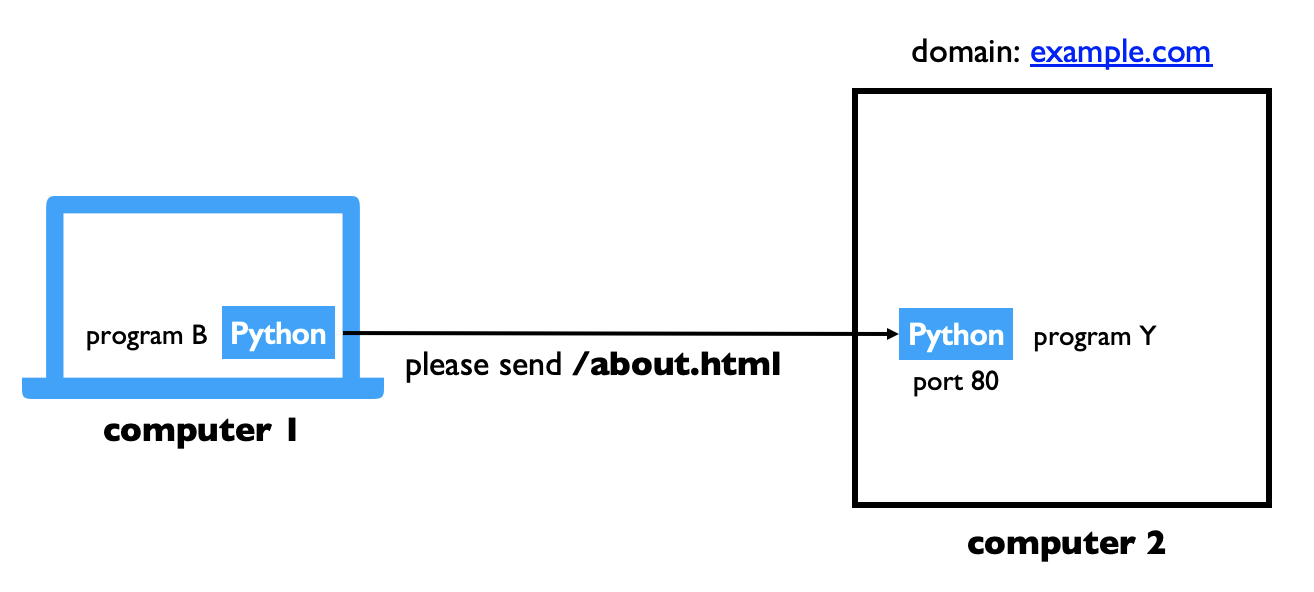
    
 - HTTP protocol
     - URL
     - Headers
     - Status Codes
 - The requests module

## HTTP Status Codes you need to know
- 200: success
- 404: not found

Here is a list of all status codes, you do NOT need to memorize it: https://en.wikipedia.org/wiki/List_of_HTTP_status_codes

## requests.get : Simple string example
- URL: https://cs220.cs.wisc.edu/hello.txt

In [13]:
url = "https://cs220.cs.wisc.edu/hello.txt"
r = requests.get(url) # r is the response
print(r.status_code)
print(r.text)

200
Hello CS220 / CS319 students! Welcome to our website. Hope you are staying safe and healthy!



In [14]:
# Q: What if the web site does not exist?
typo_url = "https://cs220.cs.wisc.edu/hello.txttttt"
r = requests.get(typo_url)
print(r.status_code)
print(r.text)

# A: We get a 403 (Forbidden error)
# The most common error that you will encounter is 404 (File not found)

403
<html>
<head><title>403 Forbidden</title></head>
<body>
<h1>403 Forbidden</h1>
<ul>
<li>Code: AccessDenied</li>
<li>Message: Access Denied</li>
<li>RequestId: M2M20K3WCPD67CH2</li>
<li>HostId: KHgGhwxZd16gmu3IQ89nPfGQfKMIHg4VMI1+gSx1VyyHCa+DaR2mv/vJS9YMLAQ4i/6ZZs5iXiU=</li>
</ul>
<h3>An Error Occurred While Attempting to Retrieve a Custom Error Document</h3>
<ul>
<li>Code: AccessDenied</li>
<li>Message: Access Denied</li>
</ul>
<hr/>
</body>
</html>



In [15]:
# We can check for a status_code error by using an assert
typo_url = "https://cs220.cs.wisc.edu/hello.txttttt"
r = requests.get(typo_url)
assert r.status_code == 200
print(r.status_code)
print(r.text)

AssertionError: 

In [ ]:
# Instead of using an assert, we often use raise_for_status()
r = requests.get(typo_url)
r.raise_for_status() #similar to asserting r.status_code == 200
r.text

# Note the error you get.... We will use this in the next cell

In [ ]:
# Let's try to catch that error

try:
    r = requests.get(typo_url)
    r.raise_for_status() #similar to asserting r.status_code == 200
    r.text
except requests.exceptions.HTTPError as e: # What's still wrong here?
    print("oops!!", e)

In [ ]:
# we often need to prepend the names of exceptions with the name of the module
# fix the error from above

try:
    r = requests.get(typo_url)
    r.raise_for_status() #similar to asserting r.status_code == 200
    r.text
except requests.HTTPError as e: #correct way to catch the error.
    print("oops!!", e)

## requests.get : JSON file example
- URL: https://cs220.cs.wisc.edu/scores.json
- `json.load` (FILE_OBJECT)
- `json.loads` (STRING)

In [ ]:
# GETting a JSON file, the long way
url = "https://cs220.cs.wisc.edu/scores.json"
r = requests.get(url)
r.raise_for_status()
urltext = r.text
print(urltext)
d = json.loads(urltext)
print(type(d), d)

In [16]:
# GETting a JSON file, the shortcut way
url = "https://cs220.cs.wisc.edu/scores.json"
#Shortcut to bypass using json.loads()
r = requests.get(url)
r.raise_for_status()
d2 = r.json()
print(type(d2), d2)

<class 'dict'> {'alice': 100, 'bob': 200, 'cindy': 300}


## Good GET Etiquette

Don't make a lot of requests to the same server all at once.
 - Requests use up the server's time
 - Major websites will often ban users who make too many requests
 - You can break a server....similar to DDoS attacks (DON'T DO THIS)
 
In CS220 we will usually give you a link to a copied file to avoid overloading the site.


### Explore real-world JSON

How to explore an unknown JSON?
- If you run into a `dict`, try `.keys()` method to look at the keys of the dictionary, then use lookup process to explore further
- If you run into a `list`, iterate over the list and print each item

### Weather for UW-Madison campus
- URL: https://api.weather.gov/gridpoints/MKX/37,63/forecast

In [17]:
# TODO: GET the forecast
url = "https://api.weather.gov/gridpoints/MKX/37,63/forecast"
r = requests.get(url)
r.raise_for_status()
weather_data = r.json()

# TODO: explore the type of the data structure 
print(type(weather_data))

# display the data
# weather_data # uncomment to see the whole JSON

<class 'dict'>


In [18]:
# TODO: display the keys of the weather_data dict
print(list(weather_data.keys()))

# TODO: lookup the value corresponding to the 'properties'
weather_data["properties"]

# TODO: you know what to do next ... explore type again
print(type(weather_data["properties"]))

['@context', 'type', 'geometry', 'properties']
<class 'dict'>


In [19]:
# TODO: display the keys of the properties dict
print(list(weather_data["properties"].keys()))

# TODO: lookup the value corresponding to the 'periods'
# weather_data["properties"]["periods"] # uncomment to see the output

# TODO: you know what to do next ... explore type again
print(type(weather_data["properties"]["periods"]))

['updated', 'units', 'forecastGenerator', 'generatedAt', 'updateTime', 'validTimes', 'elevation', 'periods']
<class 'list'>


In [20]:
# TODO: extract periods list into a variable
periods_list = weather_data["properties"]["periods"]

# TODO: create a DataFrame using periods_list
# TODO: What does each inner data structure represent in your DataFrame?
#       Keep in mind that outer data structure is a list.
#       A. rows (because outer data structure is a list)
periods_df = DataFrame(periods_list)
periods_df

number             name                  startTime  \
0        1          Tonight  2023-11-14T22:00:00-06:00   
1        2        Wednesday  2023-11-15T06:00:00-06:00   
2        3  Wednesday Night  2023-11-15T18:00:00-06:00   
3        4         Thursday  2023-11-16T06:00:00-06:00   
4        5   Thursday Night  2023-11-16T18:00:00-06:00   
5        6           Friday  2023-11-17T06:00:00-06:00   
6        7     Friday Night  2023-11-17T18:00:00-06:00   
7        8         Saturday  2023-11-18T06:00:00-06:00   
8        9   Saturday Night  2023-11-18T18:00:00-06:00   
9       10           Sunday  2023-11-19T06:00:00-06:00   
10      11     Sunday Night  2023-11-19T18:00:00-06:00   
11      12           Monday  2023-11-20T06:00:00-06:00   
12      13     Monday Night  2023-11-20T18:00:00-06:00   
13      14          Tuesday  2023-11-21T06:00:00-06:00   

                      endTime  isDaytime  temperature temperatureUnit  \
0   2023-11-15T06:00:00-06:00      False           43               F   
1   2023-11-15T18:00:00-06:00       True           64               F   
2   2023-11-16T06:00:00-06:00      False           43               F   
3   2023-11-16T18:00:00-06:00       True           63               F   
4   2023-11-17T06:00:00-06:00      False           34               F   
5   2023-11-17T18:00:00-06:00       True           44               F   
6   2023-11-18T06:00:00-06:00      False           30               F   
7   2023-11-18T18:00:00-06:00       True           49               F   
8   2023-11-19T06:00:00-06:00      False           28               F   
9   2023-11-19T18:00:00-06:00       True           45               F   
10  2023-11-20T06:00:00-06:00      False           31               F   
11  2023-11-20T18:00:00-06:00       True           44               F   
12  2023-11-21T06:00:00-06:00      False           34               F   
13  2023-11-21T18:00:00-06:00       True           44               F   

   temperatureTrend                      probabilityOfPrecipitation  \
0              None  {'unitCode': 'wmoUnit:percent', 'value': None}   
1           falling  {'unitCode': 'wmoUnit:percent', 'value': None}   
2              None  {'unitCode': 'wmoUnit:percent', 'value': None}   
3              None  {'unitCode': 'wmoUnit:percent', 'value': None}   
4              None    {'unitCode': 'wmoUnit:percent', 'value': 30}   
5           falling  {'unitCode': 'wmoUnit:percent', 'value': None}   
6              None  {'unitCode': 'wmoUnit:percent', 'value': None}   
7           falling  {'unitCode': 'wmoUnit:percent', 'value': None}   
8              None  {'unitCode': 'wmoUnit:percent', 'value': None}   
9           falling  {'unitCode': 'wmoUnit:percent', 'value': None}   
10             None  {'unitCode': 'wmoUnit:percent', 'value': None}   
11             None    {'unitCode': 'wmoUnit:percent', 'value': 30}   
12             None    {'unitCode': 'wmoUnit:percent', 'value': 50}   
13             None    {'unitCode': 'wmoUnit:percent', 'value': 40}   

                                             dewpoint  \
0   {'unitCode': 'wmoUnit:degC', 'value': -1.11111...   
1   {'unitCode': 'wmoUnit:degC', 'value': 6.666666...   
2   {'unitCode': 'wmoUnit:degC', 'value': 6.666666...   
3   {'unitCode': 'wmoUnit:degC', 'value': 7.777777...   
4   {'unitCode': 'wmoUnit:degC', 'value': 7.777777...   
5   {'unitCode': 'wmoUnit:degC', 'value': -2.77777...   
6   {'unitCode': 'wmoUnit:degC', 'value': -5.55555...   
7   {'unitCode': 'wmoUnit:degC', 'value': -0.55555...   
8   {'unitCode': 'wmoUnit:degC', 'value': -1.11111...   
9   {'unitCode': 'wmoUnit:degC', 'value': -1.11111...   
10  {'unitCode': 'wmoUnit:degC', 'value': -1.11111...   
11  {'unitCode': 'wmoUnit:degC', 'value': 1.111111...   
12  {'unitCode': 'wmoUnit:degC', 'value': 2.222222...   
13  {'unitCode': 'wmoUnit:degC', 'value': 2.222222...   

                                relativeHumidity     windSpeed windDirection  \
0   {'unitCode': 'wmoUnit:percent',

#### What is the maximum and minimum observed temperatures? Include the temperatureUnit in your display

In [21]:
min_temp = periods_df["temperature"].min()
idx_min = periods_df["temperature"].idxmin()
min_unit = periods_df.loc[idx_min, "temperatureUnit"]

max_temp = periods_df["temperature"].max()
idx_max = periods_df["temperature"].idxmax()
max_unit = periods_df.loc[idx_max, "temperatureUnit"]

print("Minimum observed temperature is: {} degree {}".format(min_temp, min_unit))
print("Maximum observed temperature is: {} degree {}".format(max_temp, max_unit))

Minimum observed temperature is: 28 degree F
Maximum observed temperature is: 64 degree F


#### Which days `detailedForecast` contains `sunny`?

In [22]:
# What courses contain the keyword "programming"?
sunny_days_df = periods_df[periods_df["detailedForecast"].str.contains("sunny")]
sunny_days_df

number      name                  startTime                    endTime  \
3        4  Thursday  2023-11-16T06:00:00-06:00  2023-11-16T18:00:00-06:00   
13      14   Tuesday  2023-11-21T06:00:00-06:00  2023-11-21T18:00:00-06:00   

    isDaytime  temperature temperatureUnit temperatureTrend  \
3        True           63               F             None   
13       True           44               F             None   

                        probabilityOfPrecipitation  \
3   {'unitCode': 'wmoUnit:percent', 'value': None}   
13    {'unitCode': 'wmoUnit:percent', 'value': 40}   

                                             dewpoint  \
3   {'unitCode': 'wmoUnit:degC', 'value': 7.777777...   
13  {'unitCode': 'wmoUnit:degC', 'value': 2.222222...   

                                relativeHumidity     windSpeed windDirection  \
3   {'unitCode': 'wmoUnit:percent', 'value': 86}  10 to 25 mph             S   
13  {'unitCode': 'wmoUnit:percent', 'value': 92}  10 to 15 mph            NW   

                                                 icon        shortForecast  \
3   https://api.weather.gov/icons/land/day/wind_bk...         Partly Sunny   
13  https://api.weather.gov/icons/land/day/rain_sh...  Chance Rain Showers   

                                     detailedForecast  
3   Partly sunny, with a high near 63. South wind ...  
13  A chance of rain showers. Partly sunny, with a...

In [23]:
sunny_days_df["name"]

3     Thursday
13     Tuesday
Name: name, dtype: object

#### Which day's `detailedForecast` has the most lengthy description?

In [24]:
idx_max_desc = periods_df["detailedForecast"].str.len().idxmax()
periods_df.iloc[idx_max_desc]['name']

'Thursday Night'

In [25]:
# What was that forecast?
periods_df.iloc[idx_max_desc]['detailedForecast']

'A chance of rain showers. Mostly cloudy, with a low around 34. West wind 15 to 25 mph, with gusts as high as 40 mph. Chance of precipitation is 30%.'

### Write it out to a CSV file on your drive
You now have your own copy!

In [26]:
# Write it all out to a single CSV file
periods_df.to_csv("campus_weather.csv", index=False)

### Other Cool APIs

- City of Madison Transit: http://transitdata.cityofmadison.com/
- Reddit: https://reddit.com/r/UWMadison.json
- Lord of the Rings: https://the-one-api.dev/
- Pokemon: https://pokeapi.co/

Remember: Be judicious when making requests; don't overwhelm the server! :)

## Next Time
What other documents can we get via the Web? HTML is very popular! We'll explore this.